In [ ]:
import matplotlib.pyplot as plt
import torch
from IPython.core.magics.execution import _format_time

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.pose import convert
from diffdrr.visualization import plot_drr

In [ ]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Siddon's method

In [ ]:
# Initialize the DRR module for generating synthetic X-rays
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=300.0,  # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,  # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)

In [ ]:
pose = convert(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZYX",
)
source, target = drr.detector(pose)
_ = drr(pose)  # Initialize drr.density

33.3 ms ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


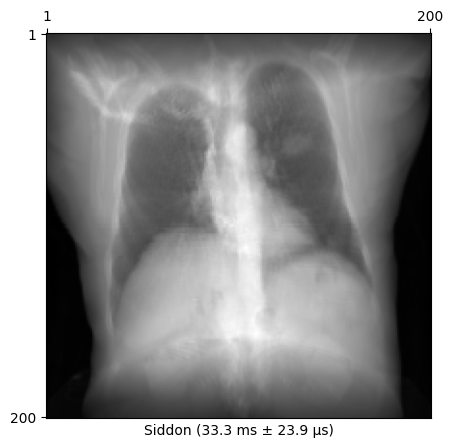

In [ ]:
times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose)
plot_drr(img, title=f"Siddon ({time})")
plt.show()

## Trilinear interpolation

In [ ]:
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=300.0,  # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,  # Pixel spacing (in mm)
    renderer="trilinear",  # Switch the rendering mode
).to(device)
_ = drr(pose)  # Initialize drr.density

529 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


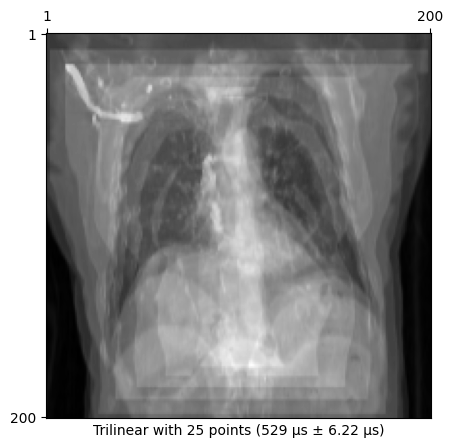

In [ ]:
n_points = 25

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

1.1 ms ± 7.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


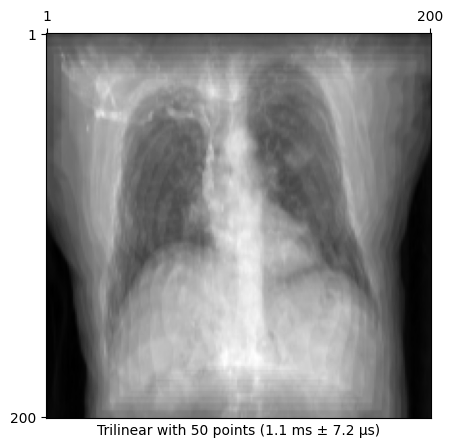

In [ ]:
n_points = 50

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

2.26 ms ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


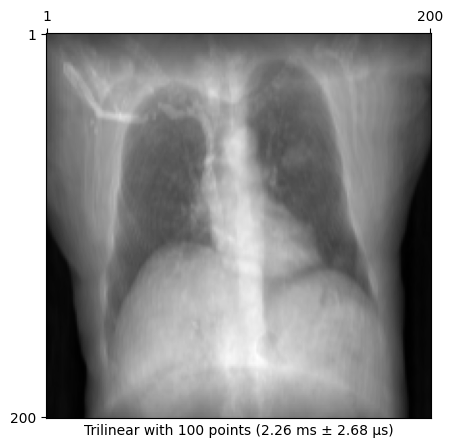

In [ ]:
n_points = 100

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

5.61 ms ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


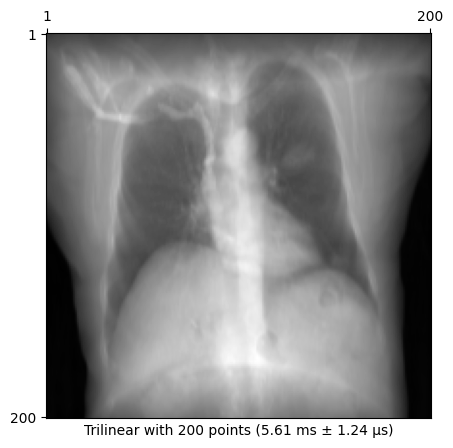

In [ ]:
n_points = 200

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points, align_corners=False)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

7.85 ms ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


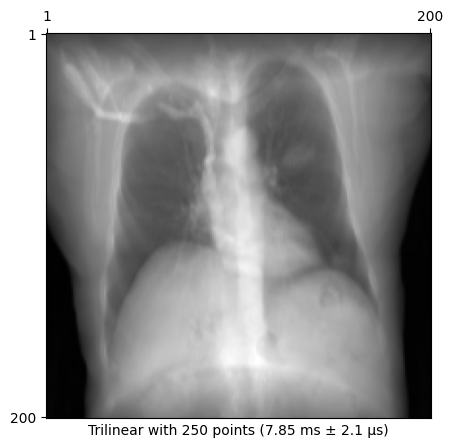

In [ ]:
n_points = 250

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

15.2 ms ± 6.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


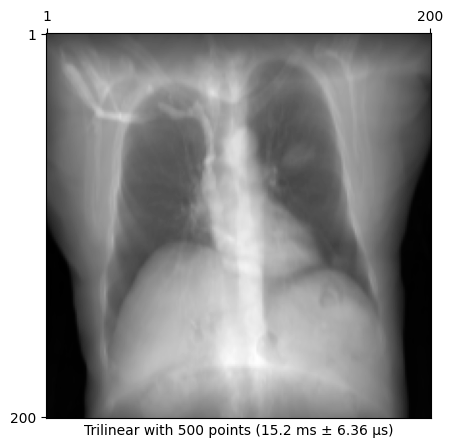

In [ ]:
n_points = 500

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

21.1 ms ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


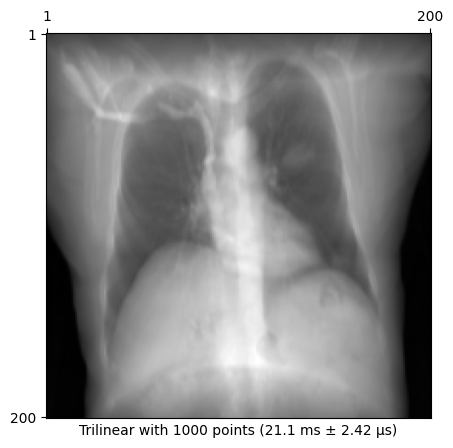

In [ ]:
n_points = 1000

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

32.8 ms ± 8.19 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


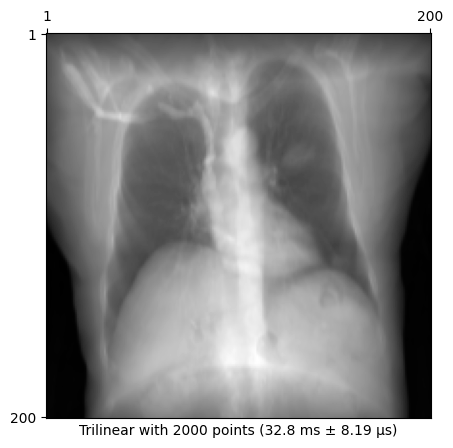

In [ ]:
n_points = 2000

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()

72 ms ± 9.48 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


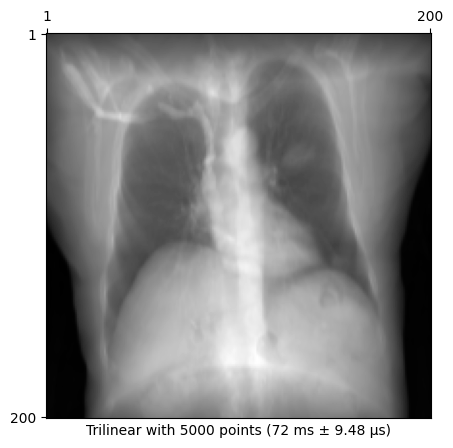

In [ ]:
n_points = 5000

times = %timeit -o drr.renderer(drr.density, drr.spacing, source, target, n_points)
time = f"{_format_time(times.average, times._precision)} ± {_format_time(times.stdev, times._precision)}"

img = drr(pose, n_points=n_points)
plot_drr(img, title=f"Trilinear with {n_points} points ({time})")
plt.show()